# Lista 8 de exercícios - Visualização de dados

Chegamos à ultima lista de exercícios do nosso curso, do tema "Visualização de dados". Aqui, usaremos um *dataset* de dados de uma certa clínica médica, em que cada observação corresponde a um paciente. Importemos os dados:

In [232]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [233]:
# Baixando os dados
data = pd.read_csv("insurance.csv")

Breve descrição das colunas:


**age**: idade do beneficiário primário

**sex**: gênero do contratante 

**bmi**: índice de massa corporal (IMC)

**children**: número de crianças cobertas pelo plano / número de dependentes

**smoker**: fumante ("yes", se fumante; "no", se não fumante)

**region**: área residencial do paciente nos EUA: Nordeste (northeast), Sudeste (southeast), Sudoeste (southwest), Noroeste (northwest).

**charges**: custos médicos individuais cobrados pelo plano de saúde

Explorando os dados:

In [234]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [236]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exercícios:

### 1) Faça um gráfico para analisar a associação entre idade e cobrança do plano.

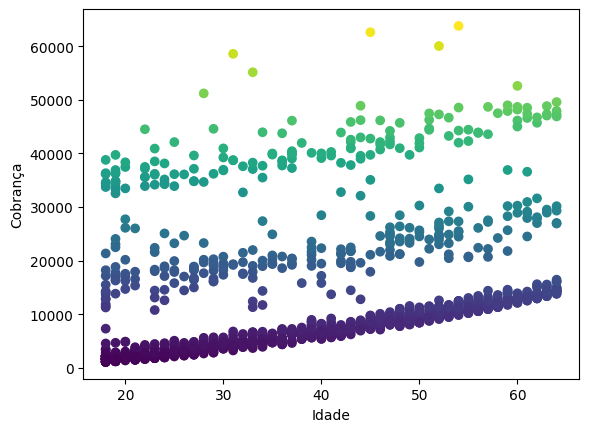

In [237]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.scatter(data['age'], data['charges'], c = data['charges'], cmap = 'viridis')
plt.xlabel('Idade')
plt.ylabel('Cobrança')
plt.show()

### 2) 

#### a) Faça um gráfico para analisar a quantidade de fumantes e não-fumantes na amostra

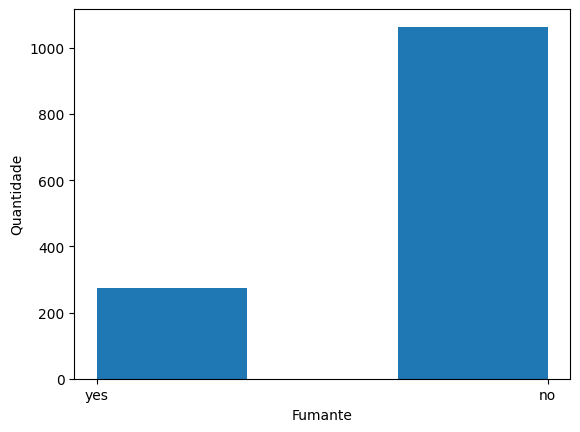

In [238]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.hist(data['smoker'], bins = 3)
plt.xlabel('Fumante')
plt.ylabel('Quantidade')
plt.show()

#### b) Agora, faça um gráfico para analisar a quantidade de homens e mulheres na amostra

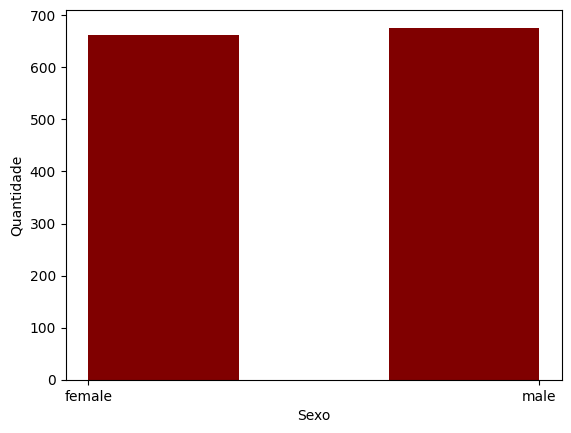

In [239]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.hist(data['sex'], bins = 3, color = 'maroon')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.show()

#### c) Por fim, faça um gráfico para analisar a quantidade de indivíduos de cada sexo em cada categoria de "smoker" (fumante)
dica: dê uma olhada na função ```.countplot()``` do *Seaborn*

<Axes: xlabel='sex', ylabel='count'>

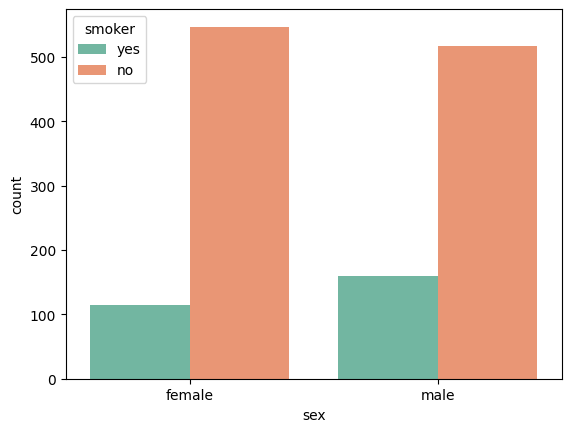

In [240]:
### SEU CÓDIGO COMEÇA AQUI ###
sns.countplot(x=data["sex"], hue=data["smoker"], palette="Set2")

### 3) Faça um gráfico que nos permita analisar a distribuição da cobrança do plano de saúde para cada região dos EUA

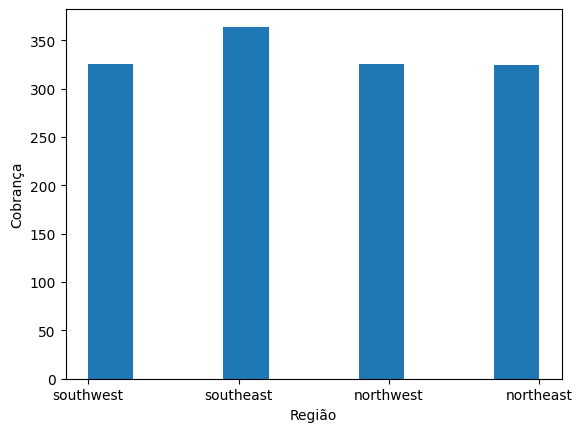

In [241]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.hist(data['region'])
plt.xlabel('Região')
plt.ylabel('Cobrança')
plt.show()

### 4) Faça um gráfico que nos permita ver a evolução da proporção de fumantes para cada idade na amostra

#### a) Faça um gráfico que nos permita ver a evolução da proporção de fumantes para cada idade na amostra

[]

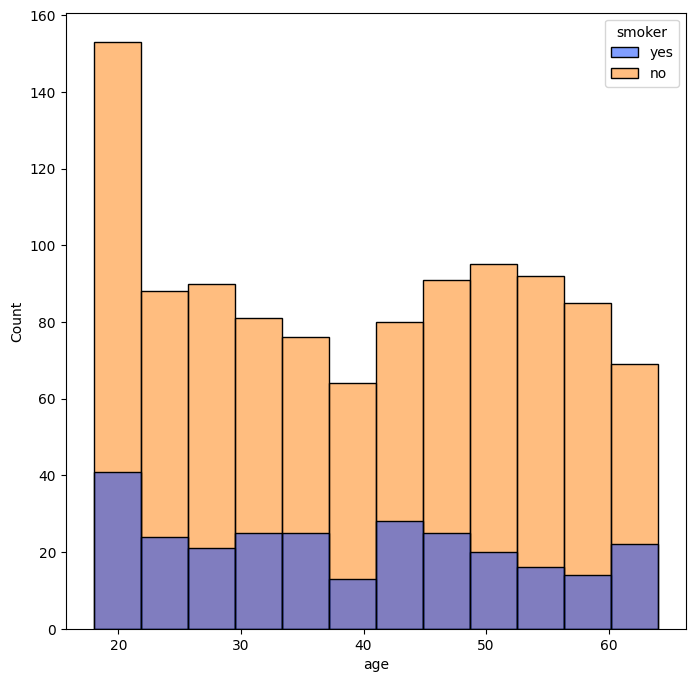

In [242]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.figure(figsize=(8, 8))
sns.histplot(x=data["age"], hue=data["smoker"], palette="bright")
plt.plot()

#### b) Faça um gráfico que nos permita ver a evolução do IMC médio para cada idade na amostra

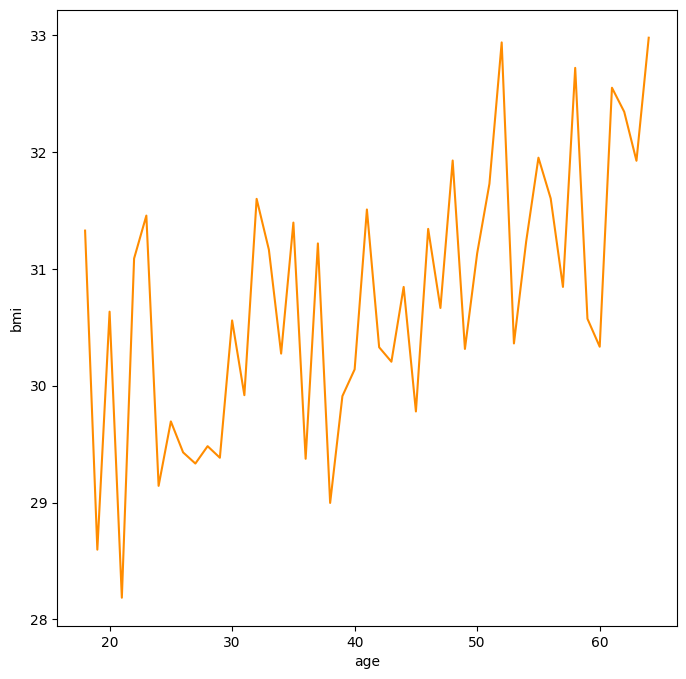

In [243]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.figure(figsize=(8, 8))
sns.lineplot(data.groupby('age')['bmi'].mean().reset_index(), x="age", y="bmi", color="darkorange")
plt.show()

#### c) Faça um gráfico que nos permita analisar a evolução do número médio de crianças no plano para cada idade na amostra

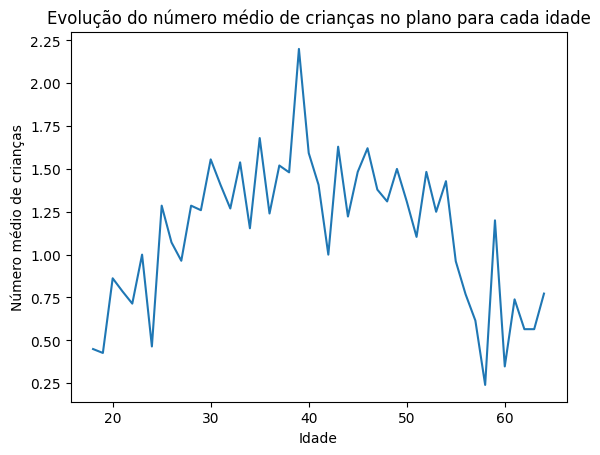

In [244]:
def media(idade):
    x = np.mean(data[data["age"] == idade]["children"])
    return x
num = {idade: media(idade) for idade in sorted(data["age"].unique())}
plt.plot(num.keys(), num.values())
plt.xlabel("Idade")
plt.ylabel("Número médio de crianças")
plt.title("Evolução do número médio de crianças no plano para cada idade")
plt.show()

### 5) Faça um gráfico que nos permita analisar a correlação entre todas as colunas ao mesmo tempo (para incluir "sex" e "smoker" na análise, crie variáveis binárias para cada uma das colunas)
dica: crie um novo dataframe com as duas colunas citadas com variáveis binárias

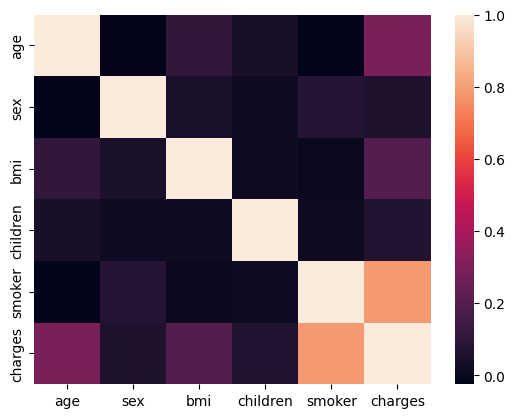

In [245]:
### SEU CÓDIGO COMEÇA AQUI ###
df_bin = data.copy()
df_bin["sex"] = df_bin["sex"].map({"male": 1, "female": 0})
df_bin["smoker"] = df_bin["smoker"].map({"yes": 1, "no": 0})

so_num = df_bin.select_dtypes(include=np.number)
correlacoes = so_num.corr()

sns.heatmap(correlacoes)
plt.show()

### 6) Faça um gráfico interativo e dinâmico da distribuição de cobrança para fumantes e não-fumantes 
dica: o nome da função na biblioteca é ```.box()```

In [246]:
### SEU CÓDIGO COMEÇA AQUI ###
px.box(data_frame=data, x="charges", y="smoker", color="smoker")